# Lab 3
## Wiktor Kurek, Dawid Stachowiak

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Zadanie 1

In [3]:
dataset = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv", index_col = 0 )
pca = PCA(2)

In [4]:
normalized_data = dataset.loc[:,"Normalized 0":]
real_data = dataset.loc[:,:"MAX"]

In [5]:
normalized_data

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
Product_Code,,,,,,,,,,,,,,,,,,,,,
P1,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
P2,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
P3,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
P4,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
P5,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P815,0.00,0.00,0.33,0.00,0.00,0.67,0.33,0.00,0.00,0.33,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
P816,0.00,0.14,0.00,0.00,0.14,0.29,0.29,0.86,0.00,0.14,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
P817,0.25,0.00,0.00,0.00,0.25,0.25,0.50,0.25,0.25,0.00,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75


In [20]:
df = pca.fit_transform(normalized_data) #redukcja wymiarowosci do 2 aby moc przedstawic to na wykresie 2D

# Zadanie 2

### K-MEANS

In [49]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters = 5, init='random')
label = model.fit_predict(df)
centroids = model.cluster_centers_
u_labels = np.unique(label)
data_kmeans = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
data_kmeans

array([[-0.48786918, -0.4510731 ,  1.        ],
       [-0.62611488, -0.30833806,  1.        ],
       [-1.45175193, -0.03505972,  3.        ],
       ...,
       [ 1.42778918,  0.18694017,  2.        ],
       [ 1.19772504,  0.25517575,  2.        ],
       [ 1.52965586, -0.40134493,  0.        ]])

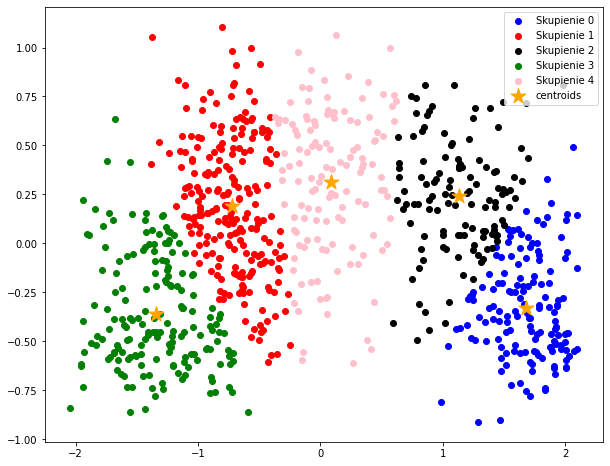

In [50]:
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]
filtered_label4 = df[label == 4]
 
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'pink')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 250, color = 'orange', marker='*')

plt.rcParams["figure.figsize"] = (10,8)
plt.legend(["Skupienie 0", "Skupienie 1", "Skupienie 2", "Skupienie 3", "Skupienie 4", "centroids"], loc ="upper right")

plt.show()

====================================================================

### K-MEANS++

In [31]:
model = KMeans(n_clusters = 4, init='k-means++') #roznica miedzy kmeans - inny sposob inicjalizacji centroidow
label = model.fit_predict(df)
centroids = model.cluster_centers_
u_labels = np.unique(label)
data_kmeans_plus = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
data_kmeans_plus

array([[-0.48786918, -0.4510731 ,  3.        ],
       [-0.62611488, -0.30833806,  3.        ],
       [-1.45175193, -0.03505972,  2.        ],
       ...,
       [ 1.42778918,  0.18694017,  0.        ],
       [ 1.19772504,  0.25517575,  0.        ],
       [ 1.52965586, -0.40134493,  0.        ]])

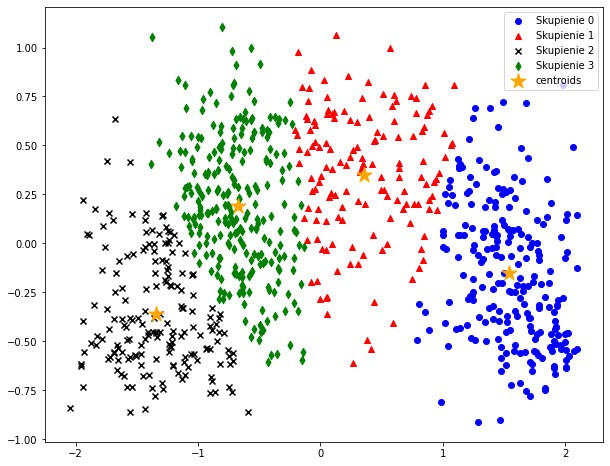

In [32]:
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]
filtered_label3 = df[label == 3]

 
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red', marker='^')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black', marker='x')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green', marker='d')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 250, color = 'orange', marker='*')

plt.rcParams["figure.figsize"] = (10,8)
plt.legend(["Skupienie 0", "Skupienie 1", "Skupienie 2", "Skupienie 3", "centroids"], loc ="upper right")

plt.show()

====================================================================

### K-MEDOIDS

In [11]:
pip install scikit-learn-extra

distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None
distutils: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9/UNKNOWN
sysconfig: /Library/Frameworks/Python.framework/Versions/3.9/include/python3.9
user = False
home = None
root = None
prefix = None
Note: you may need to restart the kernel to use updated packages.


In [97]:
from sklearn_extra.cluster import KMedoids

model =  KMedoids(n_clusters = 3)
label = model.fit_predict(df)
centroids = model.cluster_centers_
u_labels = np.unique(label)
data_kmedoids = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
data_kmedoids

array([[-0.48786918, -0.4510731 ,  2.        ],
       [-0.62611488, -0.30833806,  2.        ],
       [-1.45175193, -0.03505972,  2.        ],
       ...,
       [ 1.42778918,  0.18694017,  1.        ],
       [ 1.19772504,  0.25517575,  1.        ],
       [ 1.52965586, -0.40134493,  1.        ]])

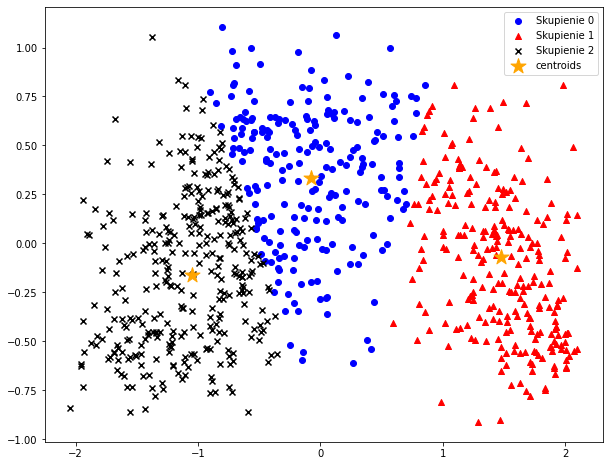

In [27]:
filtered_label0 = df[label == 0]
filtered_label1 = df[label == 1]
filtered_label2 = df[label == 2]

 
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red', marker='^')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'black', marker='x')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 250, color = 'orange', marker='*')

plt.rcParams["figure.figsize"] = (10,8)
plt.legend(["Skupienie 0", "Skupienie 1", "Skupienie 2", "centroids"], loc ="upper right")

plt.show()

# Zadanie 3

### Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 4) #domyslnie metryka euklideswoa i atrybut linkage ustawiony jako "ward"
label = model.fit_predict(df)
data_AC = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
data_AC = pd.DataFrame(data=data_AC, columns = ["x","y","label"])

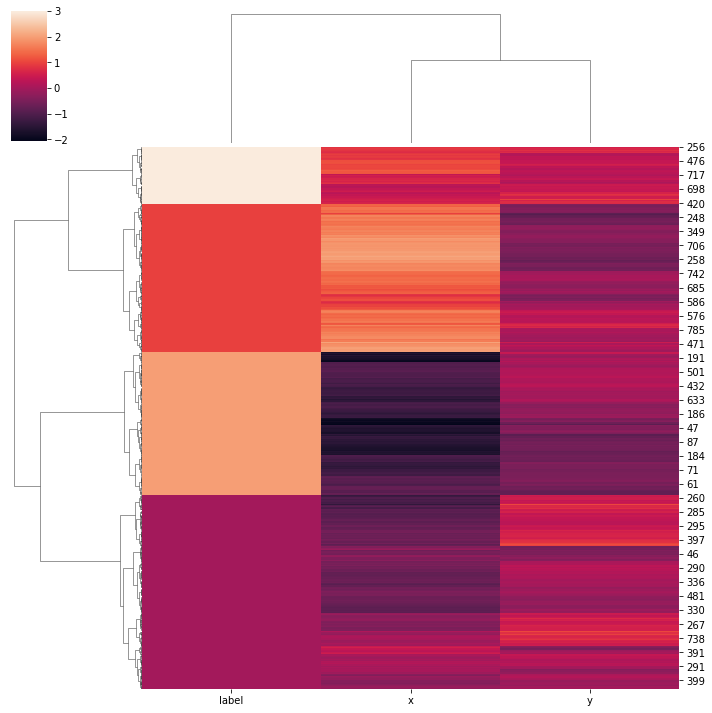

In [15]:
import seaborn as sns

sns.clustermap(data_AC, metric="euclidean", method="ward")
plt.show()

### DBSCAN

Domyślnie - DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

In [104]:
from sklearn.cluster import DBSCAN


model = DBSCAN()
label = model.fit_predict(df)
data_dbscan = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)

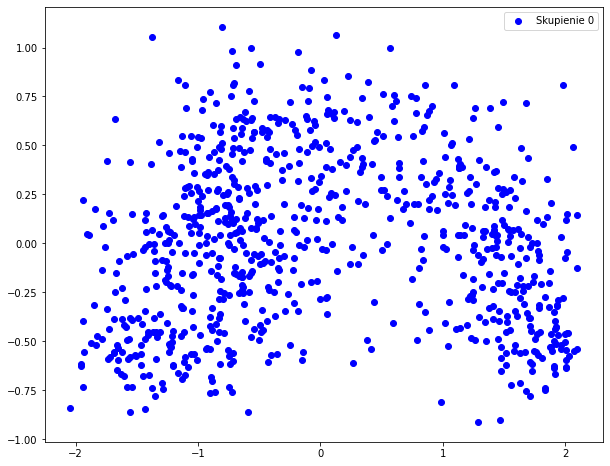

In [105]:
filtered_label0 = df[label == 0]
 
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.rcParams["figure.figsize"] = (10,8)
plt.legend(["Skupienie 0"], loc ="upper right")

plt.show()

### Zad. 4

In [48]:
from sklearn import metrics

### K-Means

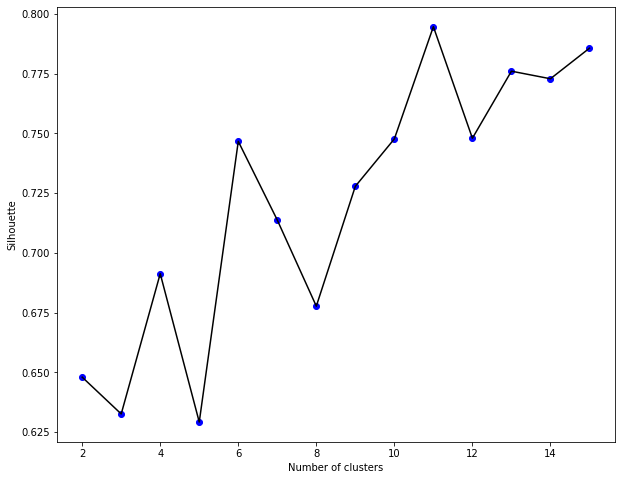

In [94]:
from sklearn.cluster import KMeans
silhouette = list()
x = list()

for k in range(2, 16):
    model = KMeans(n_clusters = k, init='random')
    label = model.fit_predict(df)
    centroids = model.cluster_centers_
    u_labels = np.unique(label)
    data_kmeans = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
    data_kmeans
    silhouette.append(metrics.silhouette_score(data_kmeans, label))
    x.append(k)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.plot(x, silhouette, 'bo', x, silhouette, 'k')
plt.show()

### K-Means+

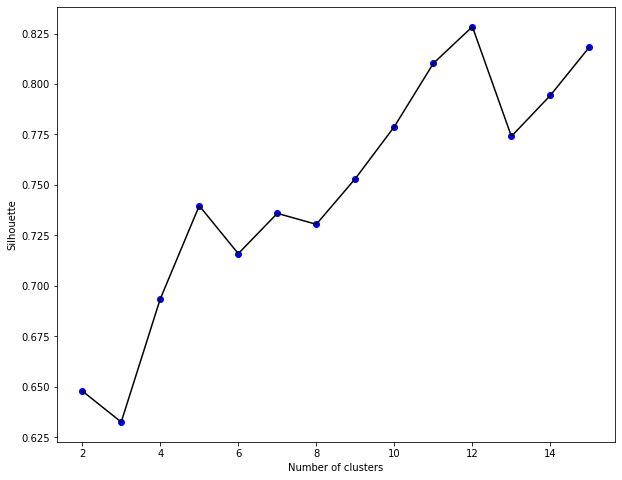

In [95]:
silhouette = list()
x = list()

for k in range(2, 16):
    model = KMeans(n_clusters = k, init='k-means++') #roznica miedzy kmeans - inny sposob inicjalizacji centroidow
    label = model.fit_predict(df)
    centroids = model.cluster_centers_
    u_labels = np.unique(label)
    data_kmeans_plus = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
    data_kmeans_plus
    silhouette.append(metrics.silhouette_score(data_kmeans_plus, label))
    x.append(k)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.plot(x, silhouette, 'bo', x, silhouette, 'k')
plt.show()

### K-Medoids

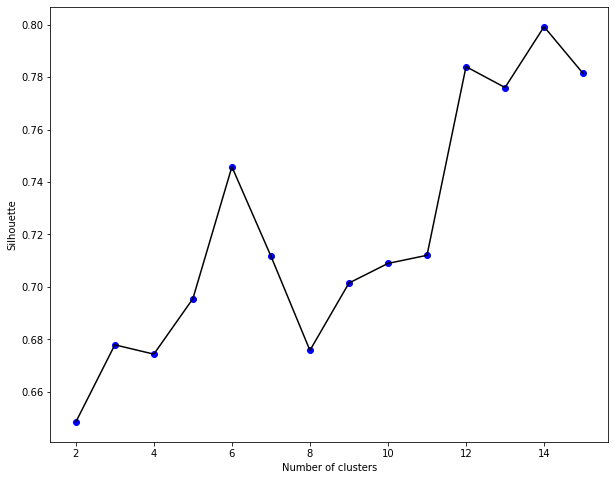

In [96]:
silhouette = list()
x = list()
for k in range(2, 16):
    model =  KMedoids(n_clusters = k)
    label = model.fit_predict(df)
    centroids = model.cluster_centers_
    u_labels = np.unique(label)
    data_kmedoids = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
    data_kmedoids
    silhouette.append(metrics.silhouette_score(data_kmedoids, label))
    x.append(k)
    
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.plot(x, silhouette, 'bo', x, silhouette, 'k')
plt.show()

### Agglomerative Clustering

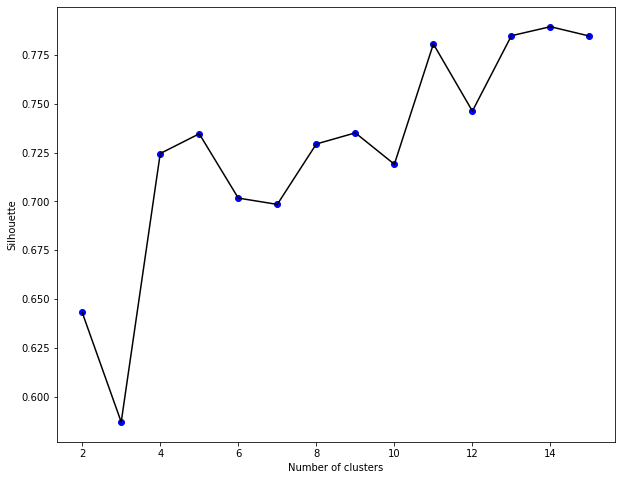

In [99]:
silhouette = list()
x = list()
for k in range(2, 16):
    model = AgglomerativeClustering(n_clusters = k) #domyslnie metryka euklideswoa i atrybut linkage ustawiony jako "ward"
    label = model.fit_predict(df)
    data_AC = np.append(df, np.reshape(label, (811,1), order='C'),axis=1)
    data_AC = pd.DataFrame(data=data_AC, columns = ["x","y","label"])
    silhouette.append(metrics.silhouette_score(data_AC, label))
    x.append(k)
    
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.plot(x, silhouette, 'bo', x, silhouette, 'k')
plt.show()